In [16]:
from scipy import misc

import matplotlib.pyplot as plt
import numpy as np
import math

import scipy.ndimage.filters as filters
import scipy.ndimage as ndimage

import cv2



In [4]:
!pip install pillow

In [17]:
image = cv2.imread('pentagon.png')

In [18]:
image

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [19]:
image.shape

(240, 320, 3)

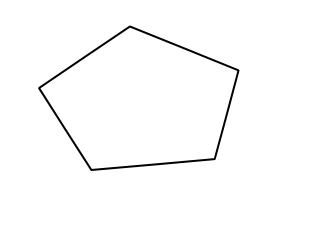

In [22]:
from google.colab.patches import cv2_imshow
cv2_imshow(image)

In [202]:
img_shape = image.shape
x_max = img_shape[0]
y_max = img_shape[1]

theta_max = math.pi
theta_min = 0.0

r_min = 0.0
r_max = math.hypot(x_max, y_max)

print(x_max, y_max, r_max)

r_dim = 200
theta_dim = 300

hough_space = np.zeros((r_dim, theta_dim))

for x in range(x_max):
  for y in range(y_max):
    if image[x,y,0] == 255:
      continue
    for t in range(theta_dim):
      theta = t * theta_max / theta_dim
      rho = x * math.cos(theta) + y * math.sin(theta)
      r = int(rho * r_dim / r_max)
      # print(ro, r, t)
      hough_space[r, t] = hough_space[r, t] + 1
 

240 320 400.0


In [124]:
hough_space

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ..., 38.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

Text(0.5, 1.0, 'Hough Space')

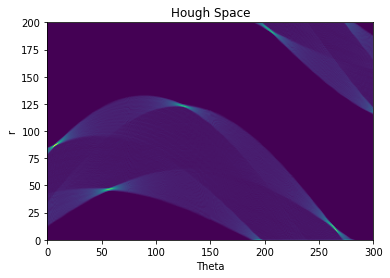

In [203]:
plt.imshow(hough_space, origin='lower')
plt.xlim(0,theta_dim)
plt.ylim(0,r_dim)

plt.xlabel(r'Theta')
plt.ylabel(r'r')
plt.title('Hough Space')

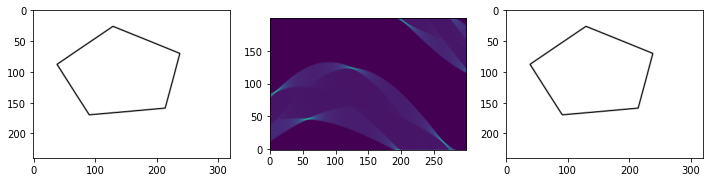

In [204]:
figure = plt.figure(figsize=(12, 12))
subplot1 = figure.add_subplot(1, 3, 1)
subplot1.imshow(image)
subplot2 = figure.add_subplot(1, 3, 2)
subplot2.imshow(hough_space, origin='lower')
subplot3 = figure.add_subplot(1, 3, 3)
subplot3.imshow(image)

In [127]:
%matplotlib inline


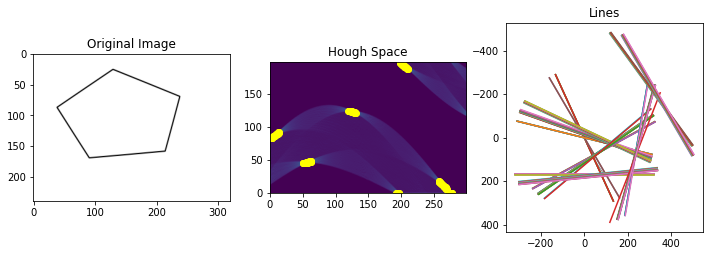

In [206]:
threshold = 100
import matplotlib.lines as mlines

figure = plt.figure(figsize=(12, 12))
subplot1 = figure.add_subplot(1, 3, 1)
subplot1.imshow(image)
subplot2 = figure.add_subplot(1, 3, 2)
subplot2.imshow(hough_space, origin='lower')
subplot3 = figure.add_subplot(1, 3, 3)
subplot3.imshow(image)

for x in range(hough_space.shape[0]):
    for y in range(hough_space.shape[1]):
      if hough_space[x][y] > threshold:
        rho = round((x * r_max ) / r_dim, 1)
        theta = round((y * theta_max ) / theta_dim, 1)
        # print(rho, theta, x, y)
        a = math.cos(theta)
        b = math.sin(-theta)
        px = []
        py = []
        for i in range(-y_max,y_max,1):
          px.append( a * i - b * rho ) 
          py.append( b * i + a * rho )
        subplot2.plot([y], [x], marker='o', color="yellow")
        subplot3.plot(px, py)
subplot1.title.set_text("Original Image")
subplot2.title.set_text("Hough Space")
subplot3.title.set_text("Lines")
plt.show()